# Exploratory Data Analysis

In this notebook, I reviewed the dataset dimensions (number of rows and columns), missing values, and duplicate records.

I then examined the distributions of survival, age, sex, passenger class, and fare, and assessed correlations between numerical variables.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv("../data/titanic-dataset.csv")

In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


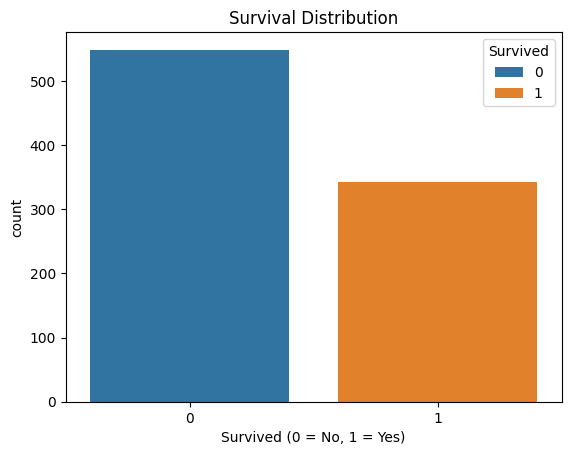

In [11]:
sns.countplot(data=df, x="Survived", hue="Survived")
plt.title("Survival Distribution")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.show()

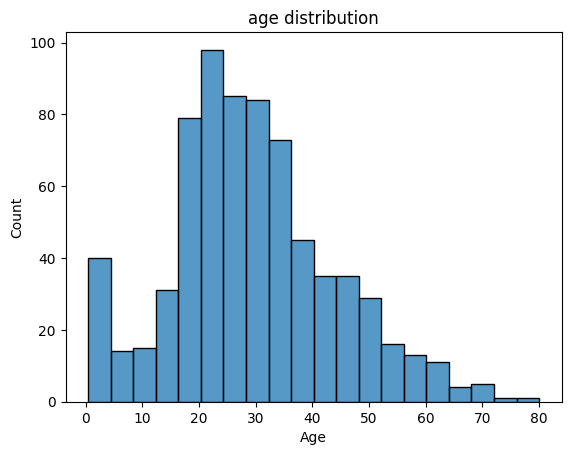

In [12]:
sns.histplot(data=df, x="Age")
plt.title("age distribution")
plt.show()

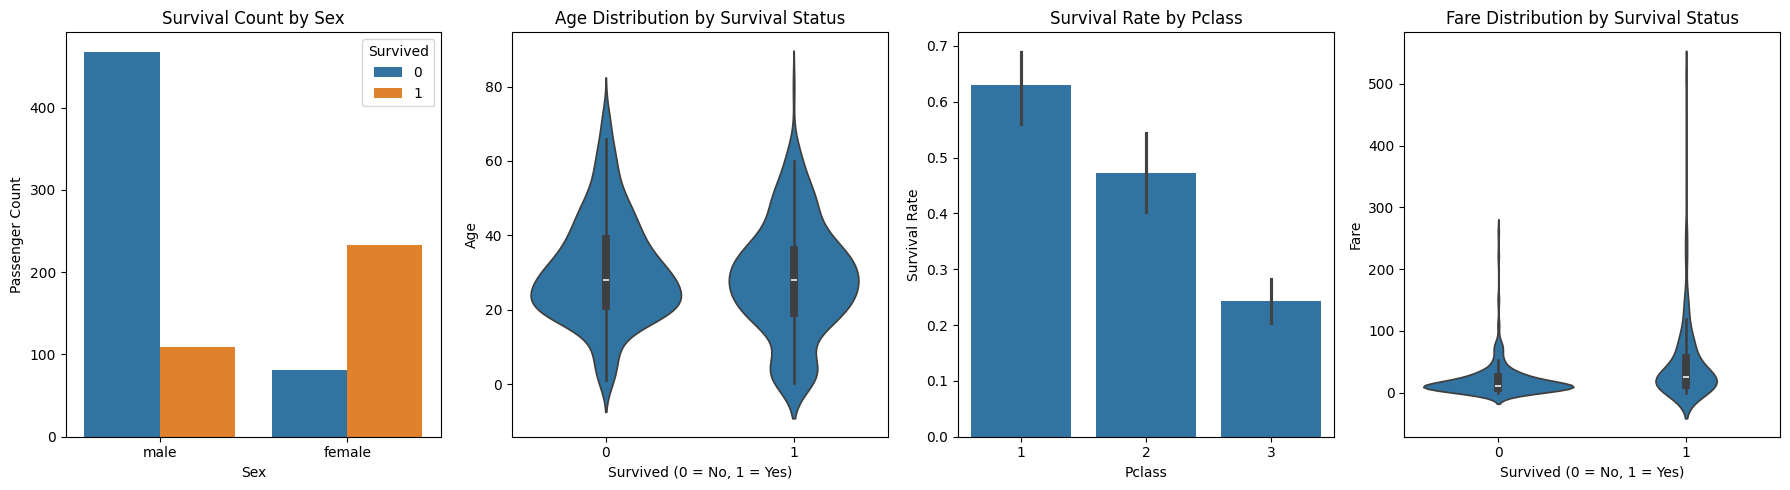

In [13]:
fig, axes = plt.subplots(1,4, figsize=(18,5))

sns.countplot(data=df, x="Sex", hue="Survived", ax=axes[0])
axes[0].set_xlabel("Sex")
axes[0].set_ylabel("Passenger Count")
axes[0].set_title("Survival Count by Sex")

sns.violinplot(data=df, x="Survived", y="Age", ax=axes[1])
axes[1].set_xlabel("Survived (0 = No, 1 = Yes)")
axes[1].set_ylabel("Age")
axes[1].set_title("Age Distribution by Survival Status")

sns.barplot(data=df, x="Pclass", y="Survived", ax=axes[2])
axes[2].set_xlabel("Pclass")
axes[2].set_ylabel("Survival Rate")
axes[2].set_title("Survival Rate by Pclass")

sns.violinplot(data=df, x="Survived", y="Fare", ax=axes[3])
axes[3].set_xlabel("Survived (0 = No, 1 = Yes)")
axes[3].set_ylabel("Fare")
axes[3].set_title("Fare Distribution by Survival Status")


plt.tight_layout()
plt.show()

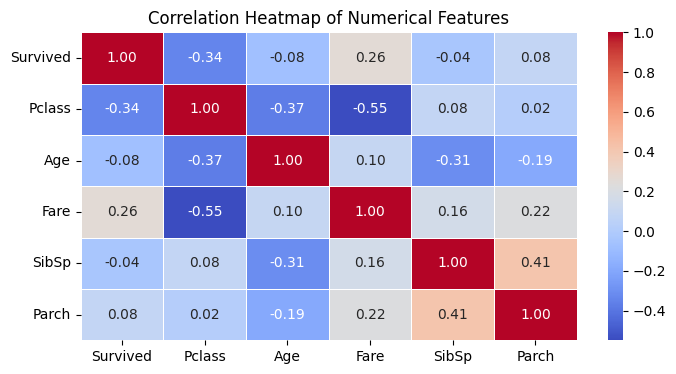

In [14]:
plt.figure(figsize=(8,4))
corr = df[["Survived", "Pclass", "Age", "Fare", "SibSp", "Parch"]].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numerical Features")
plt.show()